<a href="https://colab.research.google.com/github/HuynhVietDung/reviews-classification-using-deeplearning/blob/main/StartbucksReviewsClassificationUsingDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install contractions
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer

import re
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


# Load Dataset

In [3]:
df = pd.read_csv('reviews_data.csv')

In [4]:
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [5]:
df.tail()

,name,location,Date,Rating,Review,Image_Links
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']
849,Christian,"Ramsey, NJ","Reviewed July 19, 2000",NaN,No Review Text,['No Images']


# Preprocessing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [11]:
df.dropna(inplace = True)

In [12]:
np.unique(df['Rating'])

array([1., 2., 3., 4., 5.])

In [13]:
df

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
700,Margaret,"Cotati, CA","Reviewed Oct. 2, 2011",1.0,I ordered Via Starbucks coffee online. I recei...,['No Images']
701,Ric,"Oakville, ON","Reviewed Aug. 31, 2011",3.0,"My name is Ric **, I am journalist by professi...",['No Images']
702,Jayne,"Ny, NY","Reviewed Aug. 24, 2011",1.0,"The bagel was ice cold, not cut and not toasted.",['No Images']
703,Norma,"La Puente, CA","Reviewed Aug. 15, 2011",1.0,"In the morning of Monday, August 15, 2011, at ...",['No Images']


In [15]:
df[df['Review'] != 'No Review Text']

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
700,Margaret,"Cotati, CA","Reviewed Oct. 2, 2011",1.0,I ordered Via Starbucks coffee online. I recei...,['No Images']
701,Ric,"Oakville, ON","Reviewed Aug. 31, 2011",3.0,"My name is Ric **, I am journalist by professi...",['No Images']
702,Jayne,"Ny, NY","Reviewed Aug. 24, 2011",1.0,"The bagel was ice cold, not cut and not toasted.",['No Images']
703,Norma,"La Puente, CA","Reviewed Aug. 15, 2011",1.0,"In the morning of Monday, August 15, 2011, at ...",['No Images']


In [25]:
data = df[['Rating', 'Review']].copy()
data

,Rating,Review
0,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,5.0,** at the Starbucks by the fire station on 436...
2,5.0,I just wanted to go out of my way to recognize...
3,5.0,Me and my friend were at Starbucks and my card...
4,5.0,I’m on this kick of drinking 5 cups of warm wa...
...,...,...
700,1.0,I ordered Via Starbucks coffee online. I recei...
701,3.0,"My name is Ric **, I am journalist by professi..."
702,1.0,"The bagel was ice cold, not cut and not toasted."
703,1.0,"In the morning of Monday, August 15, 2011, at ..."


<Axes: title={'center': 'Target Variable classification'}, ylabel='Rating'>

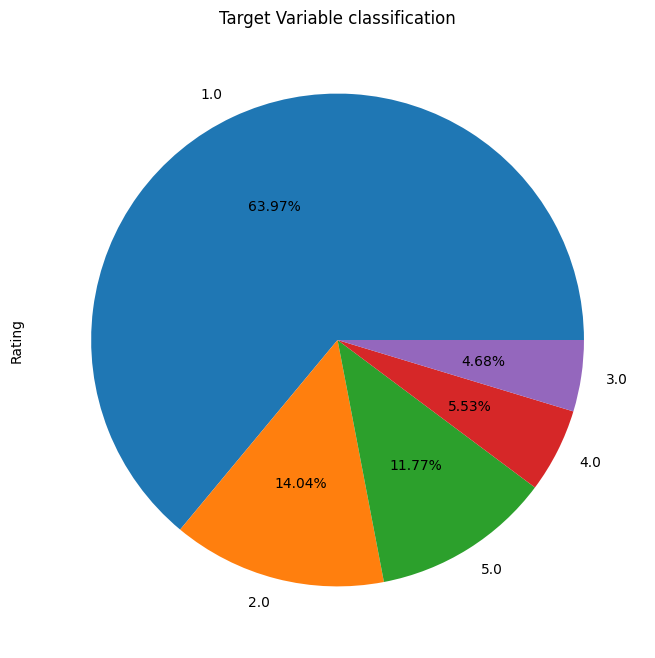

In [26]:
data['Rating'].value_counts().plot.pie(autopct = '%1.2f%%',figsize = (12,8),title = 'Target Variable classification')

## Processing Review

In [27]:
# remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    processed_text = ' '.join(filtered_words)

    return processed_text

# remove emoji
def remove_emoji_shortcode(input_str):
    emoji_shortcode_pattern = re.compile(r':[a-zA-Z0-9_]+:')
    return emoji_shortcode_pattern.sub(r'', input_str)

### Lemmatization text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words]
    processed_text = ' '.join(lemmatized_words)

    return processed_text

In [57]:
def preprocessing(text):
  # lowercase text
  text = text.lower()

  # remove urls
  url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
  text = re.sub(url_pattern, '', text)
  text = re.sub(r'\d+', '', text)

  # expand contractions
  text = contractions.fix(text)

  # remove punctuation
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\*+', '', text)

  # remove stopwords
  text = remove_stopwords(text)

  # remove emoji
  text = remove_emoji_shortcode(text)

  # lemmatization text
  text = lemmatize_text(text)
  return text

data['Review'] = data['Review'].apply(lambda x: preprocessing(str(x)))

In [58]:
data['Review']

0      amber ladonna starbucks southwest parkway alwa...
1      starbucks fire station altamonte spring fl mad...
2      wanted go way recognize starbucks employee bil...
3      friend starbucks card work thankful worker pai...
4      kick drinking cup warm water work instacart ri...
                             ...                        
700    ordered via starbucks coffee online received e...
701    name ric journalist profession sending letter ...
702                           bagel ice cold cut toasted
703    morning monday august coworker stopped starbuc...
749    found coffee starbucks overrated taste survey ...
Name: Review, Length: 705, dtype: object

In [ ]:
sentences = data['Review'].tolist()
sentences

## Prepare Train/Test Dataset

In [60]:
from tensorflow.keras.utils import to_categorical

### Assign labels
label = data['Rating'].values - 1
label

# split dataset to train and test set
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_label, test_label = train_test_split(sentences, label, test_size=0.2, random_state=42)

num_classes = 5
# Convert the labels to one hot vectors
train_label = to_categorical(train_label, num_classes=num_classes)
test_label = to_categorical(test_label, num_classes=num_classes)

## Word Embedding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 1000
embedding_dim = 64
max_length = 150

tokenizer = Tokenizer(num_words=vocab_size, oov_token = '<OOV>')
tokenizer.fit_on_texts(train_sentences)
tokenizer.word_index

In [62]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
padded_train_sequences = pad_sequences(train_sequences, maxlen= max_length, truncating = 'post', padding='post')

In [63]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
padded_test_sequences = pad_sequences(test_sequences, maxlen= max_length, truncating = 'post', padding = 'post')

# Build Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout, Bidirectional,LSTM

In [75]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 150, 64)           64000     
                                                                 
 flatten_6 (Flatten)         (None, 9600)              0         
                                                                 
 dense_19 (Dense)            (None, 128)               1228928   
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 32)                4128      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 5)               

In [76]:
model.fit(padded_train_sequences, train_label, batch_size = 64 ,epochs = 10, validation_data = (padded_test_sequences, test_label))

Epoch 1/10
9/9 [==============================] - 1s 31ms/step - loss: 1.2965 - acc: 0.5780 - val_loss: 1.3224 - val_acc: 0.5957
Epoch 2/10
9/9 [==============================] - 0s 17ms/step - loss: 1.1176 - acc: 0.6525 - val_loss: 1.1743 - val_acc: 0.5957
Epoch 3/10
9/9 [==============================] - 0s 19ms/step - loss: 1.0546 - acc: 0.6525 - val_loss: 1.1773 - val_acc: 0.5957
Epoch 4/10
9/9 [==============================] - 0s 19ms/step - loss: 0.9925 - acc: 0.6525 - val_loss: 1.1531 - val_acc: 0.6099
Epoch 5/10
9/9 [==============================] - 0s 18ms/step - loss: 0.9437 - acc: 0.6649 - val_loss: 1.1471 - val_acc: 0.6170
Epoch 6/10
9/9 [==============================] - 0s 19ms/step - loss: 0.8645 - acc: 0.6897 - val_loss: 1.1384 - val_acc: 0.6383
Epoch 7/10
9/9 [==============================] - 0s 17ms/step - loss: 0.7625 - acc: 0.7057 - val_loss: 1.1409 - val_acc: 0.6312
Epoch 8/10
9/9 [==============================] - 0s 18ms/step - loss: 0.6506 - acc: 0.7535 - val

## Bidirectional LSTM

In [69]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model2.add(Bidirectional(LSTM(64, return_sequences = True)))
model2.add(Bidirectional(LSTM(16)))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 64)           64000     
                                                                 
 bidirectional_6 (Bidirecti  (None, 150, 128)          66048     
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 32)                18560     
 onal)                                                           
                                                                 
 dense_12 (Dense)            (None, 5)                 165       
                                                                 
Total params: 148773 (581.14 KB)
Trainable params: 148773 (581.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model2.fit(padded_train_sequences, train_label, batch_size = 64 ,epochs = 10, validation_data = (padded_test_sequences, test_label))

Epoch 1/10
9/9 [==============================] - 9s 348ms/step - loss: 1.4760 - acc: 0.5816 - val_loss: 1.2968 - val_acc: 0.5957
Epoch 2/10
9/9 [==============================] - 2s 193ms/step - loss: 1.1559 - acc: 0.6507 - val_loss: 1.2280 - val_acc: 0.5957
Epoch 3/10
9/9 [==============================] - 2s 221ms/step - loss: 1.0761 - acc: 0.6507 - val_loss: 1.1765 - val_acc: 0.5957
Epoch 4/10
9/9 [==============================] - 2s 247ms/step - loss: 1.0248 - acc: 0.6507 - val_loss: 1.1747 - val_acc: 0.5957
Epoch 5/10
9/9 [==============================] - 2s 193ms/step - loss: 0.9863 - acc: 0.6507 - val_loss: 1.1550 - val_acc: 0.5957
Epoch 6/10
9/9 [==============================] - 2s 193ms/step - loss: 0.9193 - acc: 0.6507 - val_loss: 1.1040 - val_acc: 0.5957
Epoch 7/10
9/9 [==============================] - 2s 195ms/step - loss: 0.8241 - acc: 0.6560 - val_loss: 1.1008 - val_acc: 0.6525
Epoch 8/10
9/9 [==============================] - 2s 196ms/step - loss: 0.7398 - acc: 0.71

## Some New Reviews Test

In [88]:
test_samples = ['** at the Starbucks by the fire station on 436 in Altamonte Springs, FL made my day and finally helped me figure out the way to make my drink so I’d love it. She took time out to talk to me for 2 minutes to make my experience better than what I’m used to. It was much appreciated! I’ve had bad experiences one after another at the Starbucks that’s closest to me in my work building with my drinks not being great along with not great customer service from specific baristas. Niko was refreshing to speak to and pleasant. The drink was perfect! Store 11956',
                'Me and my friend were at Starbucks and my card didn’t work. Thankful the worker there, paid for our drinks. And was very nice about it, it didn’t seem to bother him that he paid for our drinks. This made my day, but made me look like a fool because my card didn’t work. All thanks to Dillon. At Shoreline WA in Safeway. Thank you so much Dillon for the help, support and, kindness. I rate this 1000/10 if I could but, other than that, 10/10.',
                'Starbucks near me just launched new fall foods and beverages yesterday. By noon yesterday they were out of all new items. The fall launch is huge and many people look forward to it all year. Maybe if you don’t have enough product to last even a couple of days, push back the launch until you do? I was so happy to get the email that it had come out that I left work on my break to brighten my day and so very disappointed to get there at 12:30pm and find out that it was all gone. Please Starbucks, do better.',
                "I have tried Starbucks several different times in different locations just in case it was just the one store. But it's not. If you like coffee that taste like dirt scooped off the ground at a garbage dump, then this is the place for you.",
                "Their coffee is somewhat bitter and is very overpriced. In addition, I would like to see more gluten-free, or at least wheat-free, items on the menu. The advantages? Customers can take their time enjoying their food and beverages if they choose to do so on premises, and nobody hassles anyone to move along. Perhaps if Starbucks paid their baristas decent wages, employees wouldn't feel compelled to put out a tacky and obnoxious tip jar, something customers have been seeing more and more of in places that don't offer table service! Did Starbucks start this annoying trend, or just encourage it?",
                'Coffee is very expensive --- I will stay home & make my own w/ Some of the best in this state: Mello Joy Coffee. The ones I do like/Love are so full of calories I cannot see the advantage to have 1 cup as opposed to a meal somewhere.',
                'The chain has grown too fast. The service is horrible and the drinks are sugar filled. The coffee is bitter and inconsistent. I get staff members who try and friend me on Facebook. Strange at best. Overpriced and not even good.',
                ]

def classify_review(text, model):
  text_sen = preprocessing(text)
  test_seq = tokenizer.texts_to_sequences([text_sen])

  padded_test_seq = pad_sequences(test_seq, maxlen = max_length, truncating = 'post', padding = 'post')
  return np.argmax(model.predict(padded_test_seq)) + 1

In [90]:
for sen in test_samples:
  print(sen,' ',classify_review(sen, model))

1/1 [==============================] - 0s 16ms/step
** at the Starbucks by the fire station on 436 in Altamonte Springs, FL made my day and finally helped me figure out the way to make my drink so I’d love it. She took time out to talk to me for 2 minutes to make my experience better than what I’m used to. It was much appreciated! I’ve had bad experiences one after another at the Starbucks that’s closest to me in my work building with my drinks not being great along with not great customer service from specific baristas. Niko was refreshing to speak to and pleasant. The drink was perfect! Store 11956   5
1/1 [==============================] - 0s 15ms/step
Me and my friend were at Starbucks and my card didn’t work. Thankful the worker there, paid for our drinks. And was very nice about it, it didn’t seem to bother him that he paid for our drinks. This made my day, but made me look like a fool because my card didn’t work. All thanks to Dillon. At Shoreline WA in Safeway. Thank you so muc